# Dohyun Kang's visualization project

- Hello, this is Dohyun Kang's visualization project using Jupyter Notebook, conducted on February, 2023.
- If you want to see all codes about this project, please go to Michelin data.ipynb file.
- DATA is based on January 2023  Michelin Guide data from kaggle.com



# Michelin star-rated restaurant


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import re
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
# pd.set_option('display.float_format', '{:.2f}'.format)
df = pd.read_csv('Michelin_data.csv')
df.fillna('No Information', inplace=True)
# df.round(2)

In [2]:
#bring data of Michelin-rated restaurants only
star_only = df['Award'] != 'Bib Gourmand'
world_star_list = df[star_only]
# world_star_list

## How many Michelin star-rated restaurants are there worldwide?

### Answer: 3369

In [3]:
len(world_star_list)

3369

##  Top 23 countries with the most number of Michelin star-rated restaurants


In [4]:

location_group = world_star_list.groupby('Location').size().sort_values(ascending=False)
location_group1 = world_star_list.groupby('Location').size().sort_values(ascending=False).head(23)
#if i want tto search city where has at least 3 michelin rated restaurants.
#min_size = 3
# location_filter = location_group.filter(lambda x: len(x) >= min_size)
# location_filter1  = location_filter.groupby('Location').size().sort_values(ascending=False)
location_filter1 = dict(location_group)
location_filter2 = dict(location_group1)



In [5]:
#create a new hash table to collect data of county. Sort through data and remove city name.
new_filter = {}
for key,number in location_filter1.items():
    key = key.split(", ")[-1]
    if key not in new_filter.keys(): 
        new_filter[key] = number
    else:
        new_filter[key] += number
# new_filter

In [6]:
#number check.
# sum = 0
# for x in new_filter.values():
#     sum += x
# sum

In [7]:
#sort cuisine_count dict to set biggest one comes first
new_filter = {k: v for k,v in sorted(new_filter.items(), key=lambda item:item[1], reverse = True)}
# new_filter

In [8]:
star_country_color={
"France" : "#17548C",
"Japan" : "#BC002D",
"Italy" : "#CD212A",
"Germany" : "#DD0000",
"Spain" : "#FABD00",
"USA" : "#BF0A30",
"United Kingdom" : "#012169",
"Switzerland" : "#FF0000",
"Belgium" : "#FDDA24",
"China Mainland" : "#EE1C25",
"Netherlands" : "#A91F32",
"Hong Kong" : "#FF0000",
"Singapore" : "#EE2536",
"Taipei Taichung" : "#007F00",
"Portugal" : "#046A38",
"South Korea" : "#0047A0",
"Thailand" : "#ef3340",
"Denmark" : "#d1050c",
"Canada":"#e82042",
"Sweden" : "#fecd00",
"Ireland" : "#169B62",
"Austria" : "#C8102E",
"Macau" : "#067662"
}
star_country_colors = []
for value in star_country_color.values():
    star_country_colors.append(value)

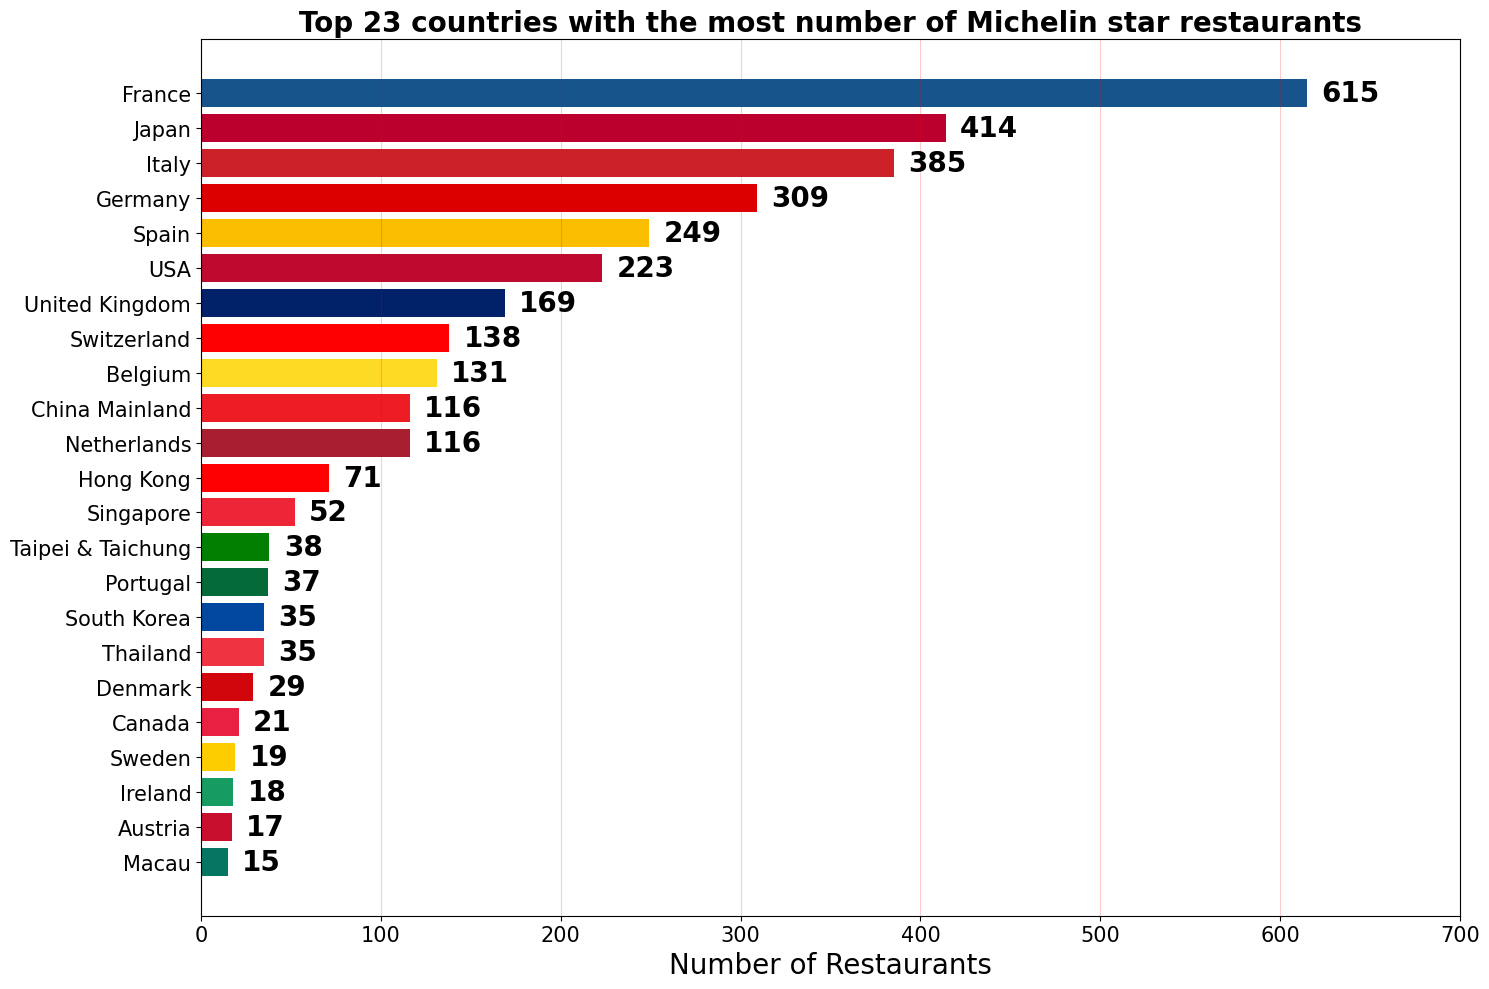

In [9]:
## draw top 23 countries where Michelin star-rated restaurants located in.
country_key = []
country_number = []
for key, number in new_filter.items():
    country_key.append(key)
    country_number.append(number)
country_key = country_key[0:23]
country_key.reverse()
country_number = country_number[0:23]
country_number.reverse()
plt.figure(figsize=(15, 10))
plt.barh(country_key, country_number, color = star_country_colors[::-1])
plt.xlim(0, 700)
plt.xlabel("Number of Restaurants", fontsize =20)
plt.title("Top 23 countries with the most number of Michelin star restaurants", fontsize=20, fontweight = 'bold')
plt.grid(axis= 'x', color = 'red', alpha=0.2)
for idx, rect in enumerate(country_number):
    plt.text(rect + 8, idx, str(rect), va='center', color = 'black', fontweight='bold', fontsize= 20)
plt.tight_layout()
#plt.savefig("Top_23_Countries.png", dpi = 100)
plt.show()

## TOP 23 Cities

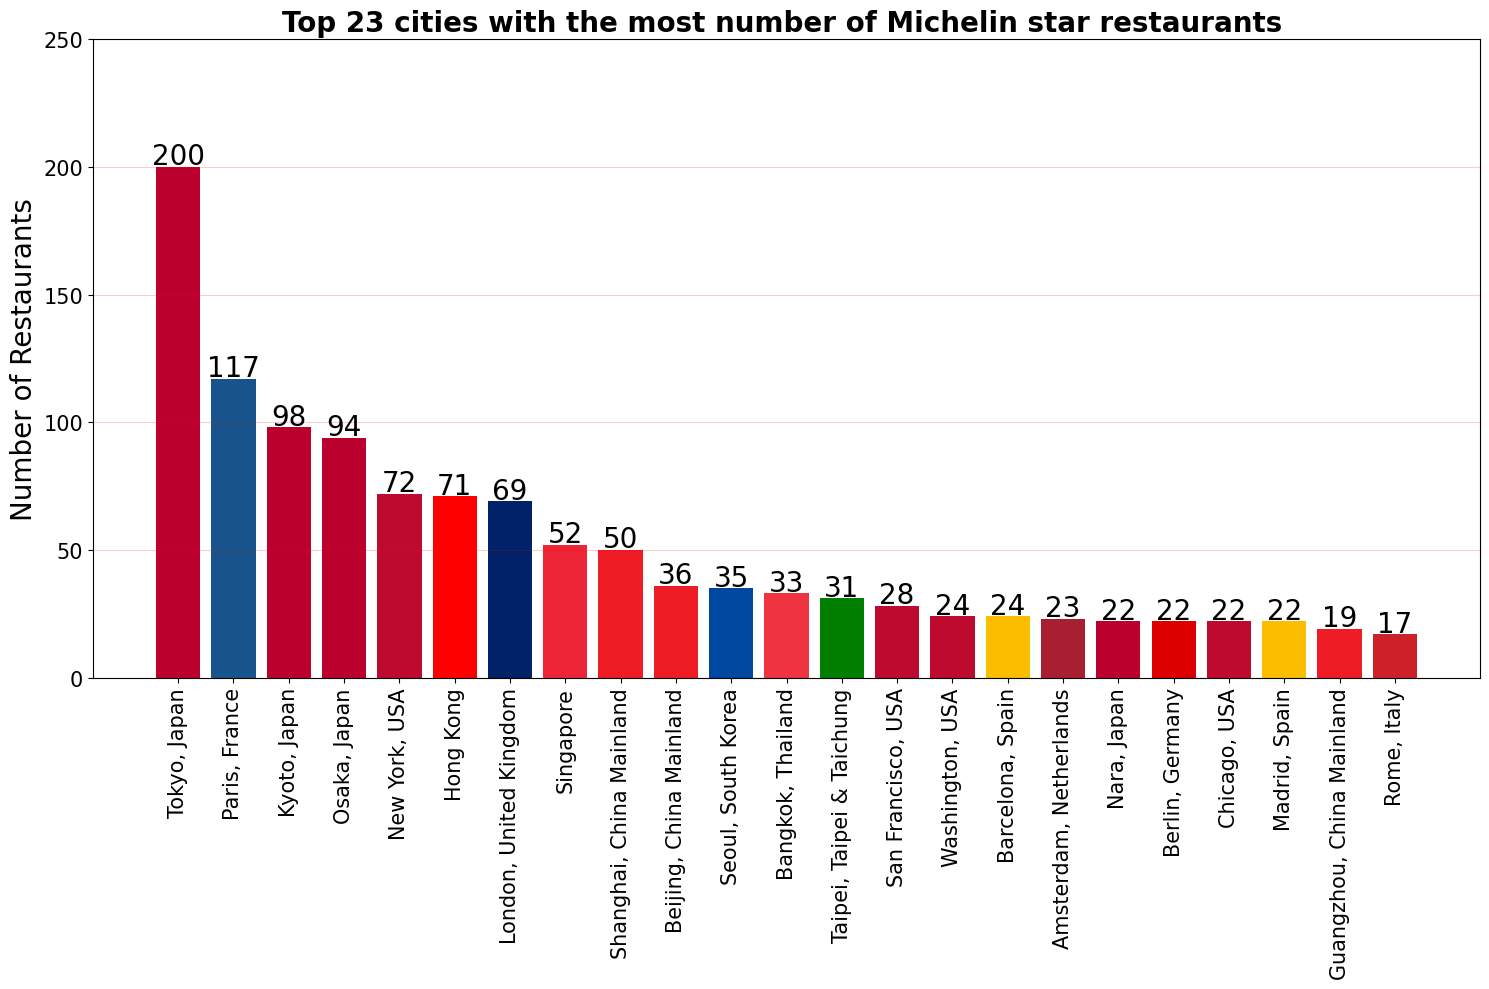

In [10]:
#draw bar chart for top 23 city where has Michelin-rated restaurants
star_city_color = ["#BC002D","#17548C","#BC002D","#BC002D","#BF0A30","#FF0000","#012169","#EE2536","#EE1C25","#EE1C25","#0047A0","#EF3340","#007F00","#BF0A30","#BF0A30","#FABD00","#A91F32","#BC002D","#DD0000","#BF0A30","#FABD00","#EE1C25","#CD212A"]
index = np.arange(len(location_filter2.values()))
location_label = []
number_of_restaurant = []
for city, number in location_filter2.items():
    location_label.append(city)
    number_of_restaurant.append(number)
plt.figure(figsize=(15,10))
bar = plt.bar(location_label, number_of_restaurant, color = star_city_color)
plt.xticks(rotation=90)
plt.ylim(0, 250)
plt.ylabel("Number of Restaurants", fontsize = 20)
plt.title("Top 23 cities with the most number of Michelin star restaurants ", fontsize= 20, fontweight= 'bold')
plt.grid(axis= 'y', color = 'red', alpha=0.2)
for idx, rect in enumerate(bar):
    plt.text(location_label[idx], number_of_restaurant[idx]+ 1, number_of_restaurant[idx], ha='center', color = 'black', fontsize = 20)
plt.tight_layout()
#plt.savefig("Top_23_Cities.png", dpi = 100)

plt.show()

## How many number of Michelin three star-rated restaurants in the world?
### Answer: 142

In [11]:
#Get data for 3 michelin star restaurants in the world
three_star =world_star_list['Award'] == '3 MICHELIN Stars'
three_star = world_star_list[three_star]
len(three_star)

142

In [12]:
#data for country
three_star_loc = three_star.groupby('Location').size().sort_values(ascending=False)
#data for city
three_star_loc1 = three_star.groupby('Location').size().sort_values(ascending=False).head(19)
#turn data into dictionary form to iterate
three_star_loc_dict = dict(three_star_loc)
three_star_loc1_dict = dict(three_star_loc1)


## TOP Countries

In [13]:
#use dictionary form from above and rebuild hash table to sort by country
three_star_country = {}
for country, number in three_star_loc_dict.items():
    country = country.split(', ')[-1]
    if country not in three_star_country.keys():
        three_star_country[country] = number
    else:
        three_star_country[country] += number


In [14]:
#sort cuisine_count dict to set biggest one comes first
three_star_country = {k: v for k,v in sorted(three_star_country.items(), key=lambda item:item[1], reverse = True)}
# new_filter

In [15]:
#adding colors
three_star_country_color ={
"France" : "#17548C",
"Japan" : "#BC002D",
"USA" : "#BF0A30",
"Spain" : "#FABD00",
"Italy" : "#CD212A",
"Germany" : "#DD0000",
"United Kingdom" : "#012169",
"Hong Kong" : "#FF0000",
"China Mainland" : "#EE1C25",
"Switzerland" : "#FF0000",
"Singapore" : "#EE2536",
"Macau" : "#067662",
"Belgium" : "#FDDA24",
"South Korea" : "#0047A0",
"Denmark" : "#d1050c",
"Netherlands" : "#A91F32",
"Norway" : "#00205B",
"Austria" : "#C8102E",
"Taipei Taichung" : "#007F00",
"Sweden" : "#fecd00"
}
three_star_country_colors = []
for value in three_star_country_color.values():
    three_star_country_colors.append(value)

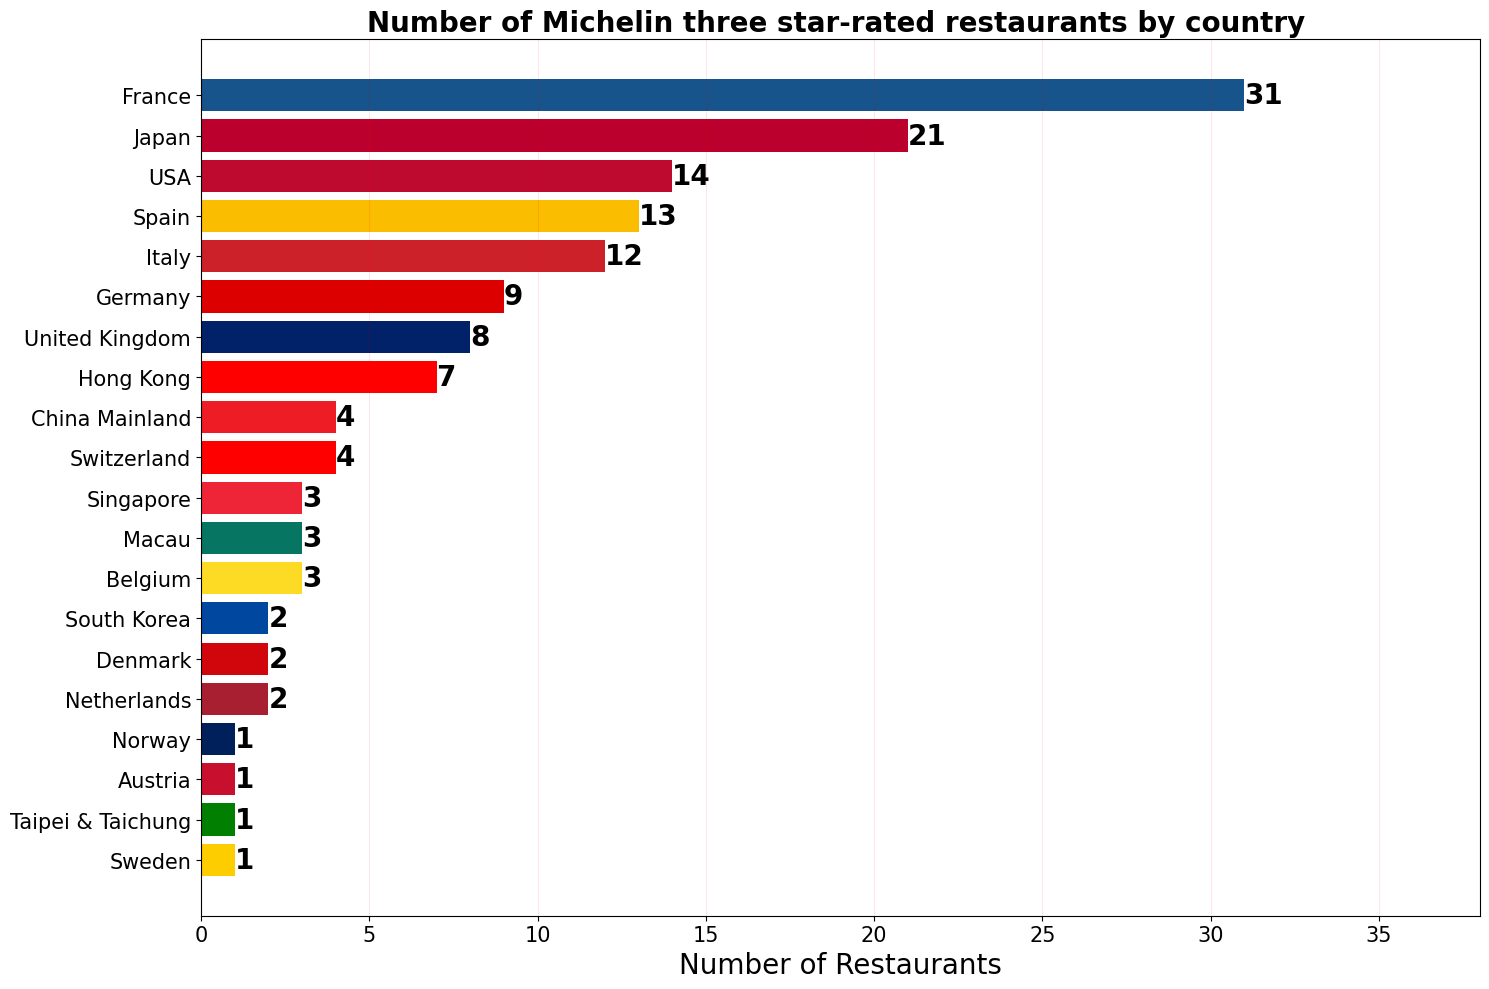

In [16]:
#draw bar chart by iterate dict we set above
country_key = []
country_number = []
for key, number in three_star_country.items():
    country_key.append(key)
    country_number.append(number)
country_key.reverse()
country_number.reverse()
plt.figure(figsize=(15, 10))
plt.barh(country_key, country_number, color = three_star_country_colors[::-1])
plt.xlim(0, 38)
plt.xlabel("Number of Restaurants", fontsize= 20)
plt.title("Number of Michelin three star-rated restaurants by country ", fontsize=20, fontweight ='bold')
plt.grid(axis= 'x', color = 'red', alpha=0.1)
for idx, rect in enumerate(country_number):
    plt.text(rect, idx, str(rect), va='center', color = 'black', fontweight='bold', fontsize= 20)
plt.tight_layout()
#plt.savefig("Top_threestar_Countries", dpi = 100)
plt.show()

## Top 23 CIties

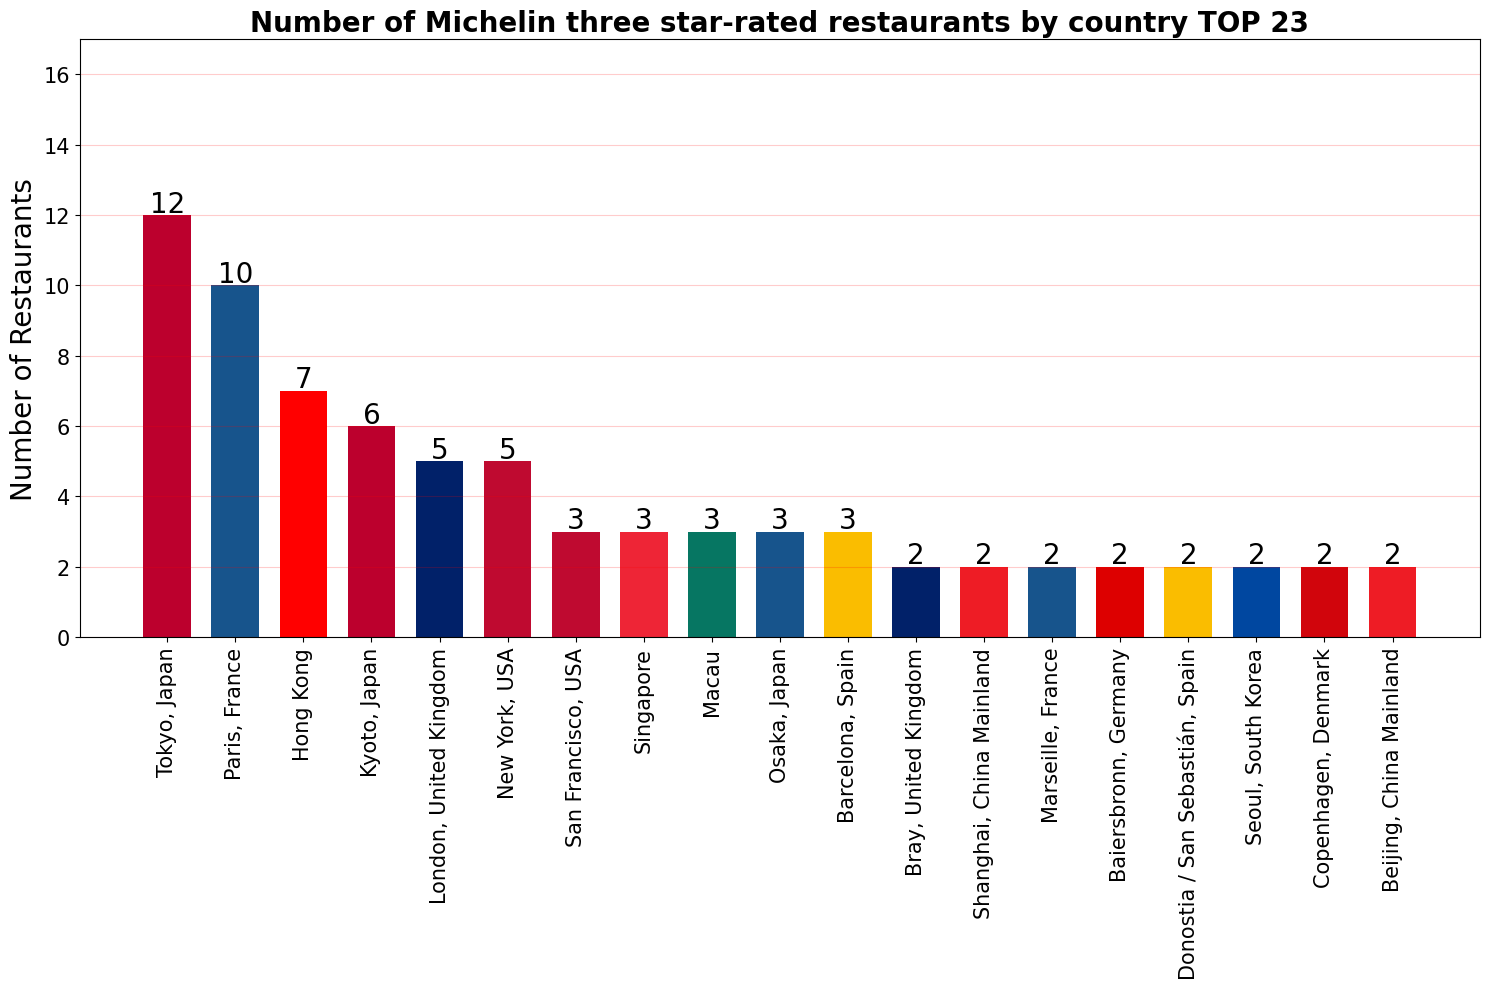

In [17]:
#iterate dictionary we set above, and draw bar chart
three_star_cities_colors =["#BC002D", "#17548C", "#FF0000","#BC002D", "#012169","#BF0A30", "#BF0A30", "#EE2536", "#067662","#17548C","#FABD00","#012169","#EE1C25","#17548C","#DD0000","#FABD00","#0047A0","#d1050c","#EE1C25"]
index = np.arange(len(three_star_loc1_dict.values()))
location_label = []
number_of_restaurant = []
for city, number in three_star_loc1_dict.items():
    location_label.append(city)
    number_of_restaurant.append(number)
plt.figure(figsize=(15,10))
bar = plt.bar(location_label, number_of_restaurant, color = three_star_cities_colors, width=0.7)
plt.xticks(rotation=90)
plt.ylabel("Number of Restaurants", fontsize =20)
plt.ylim(0, 17)
plt.title("Number of Michelin three star-rated restaurants by country TOP 23", fontsize= 20, fontweight= 'bold')
plt.grid(axis= 'y', color = 'red', alpha=0.2)
for idx, rect in enumerate(bar):
    plt.text(location_label[idx], number_of_restaurant[idx]+ 0.1, number_of_restaurant[idx], ha='center', color = 'black', fontsize = 20)
plt.tight_layout()
#plt.savefig("Top_23_threestar_Cities.png", dpi = 100)

plt.show()

# USA

## How many Michelin star-rated restaurants in USA?
### Answer: 223
---

In [18]:
#How many restaurants in USA is registered in Michelin Guide
usa =df['Location'].str.contains('USA')
usa = df[usa]
award = usa['Award'] == 'Bib Gourmand'
usa_star = usa[~award]
len(usa_star)


223

## USA Michelin star Contemporary vs traditional

### What is contemporary style?
It is basically non-traditional style which is focusing on modern technique, creativity, fusion,and innovation.

In [19]:
#restaruants where serve contemporary cuisine
contemporary = usa_star['Cuisine'].str.contains('Contemporary') # show how many restaurant doing contemporary cuisines
contemporary_list = usa_star[contemporary]
non_contemporay_list = usa_star[~contemporary]
# contemporary_list

In [20]:
def auto_pct(number):
    number = number / 223 #total # of restaurants
    return "{0:.0%}".format(number)

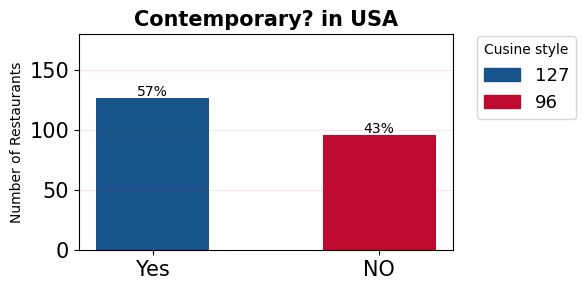

In [21]:
from matplotlib.patches import Patch

labels = ['Yes', 'NO' ]
values = [len(contemporary_list), len(non_contemporay_list)]
pos = np.arange(len(labels))
colors = ['#17548C', '#BF0A30']
plt.figure(figsize=(6, 3))
bar = plt.bar(pos, values, width=0.5, color = colors, alpha=1, align='center')
for idx, rect in enumerate(bar):
    plt.text(pos[idx], values[idx]+2, auto_pct(values[idx]), ha="center")
plt.ylim(0, 180)
plt.xticks(pos, labels)
plt.ylabel('Number of Restaurants', fontsize =10)
plt.title('Contemporary? in USA', fontsize= 15, fontweight= 'bold')
plt.grid(axis= 'y', color = 'red', alpha=0.1)
cmap = dict(zip(values, colors))

patches = [Patch(color = v, label = k) for k, v in cmap.items()]

plt.legend(title='Cusine style', labels=values, handles=patches, bbox_to_anchor=(1.04, 0.8), loc='center left', fontsize=13,  frameon=True)
plt.tight_layout()
#plt.savefig("USA_Michelin.png", dpi = 100)
plt.show()

## contemp sorting


In [22]:
c_cuisine_count = {}
#find each specialized cuisine in comtemporary data
c_american = contemporary_list['Cuisine'].str.contains('American') # show how many restaurant doing contemporary cuisines
c_cuisine_count['American'] = len(contemporary_list[c_american])

c_cali = contemporary_list['Cuisine'].str.contains('Californian')
c_cuisine_count['Californian'] = len(contemporary_list[c_cali])

c_french = contemporary_list['Cuisine'].str.contains('French')
c_cuisine_count['French'] = len(contemporary_list[c_french])

c_japan = contemporary_list['Cuisine'].str.contains('Japanese')
c_cuisine_count['Japanese'] = len(contemporary_list[c_japan])

c_asia = contemporary_list['Cuisine'].str.contains('Asian')
c_cuisine_count['Asian'] = len(contemporary_list[c_asia])

c_china = contemporary_list['Cuisine'].str.contains('Chinese')
c_cuisine_count['Chinese'] = len(contemporary_list[c_china])

c_col = contemporary_list['Cuisine'].str.contains('Colombian')
c_cuisine_count['Colombian'] = len(contemporary_list[c_col])

c_eu = contemporary_list['Cuisine'].str.contains('European')
c_cuisine_count['European'] = len(contemporary_list[c_eu])

c_italy = contemporary_list['Cuisine'].str.contains('Italian')
c_cuisine_count['Italian'] = len(contemporary_list[c_italy])

c_Seafood = contemporary_list['Cuisine'].str.contains('Seafood')
c_cuisine_count['Seafood'] = len(contemporary_list[c_Seafood])

c_Filipino = contemporary_list['Cuisine'].str.contains('Filipino')
c_cuisine_count['Filipino'] = len(contemporary_list[c_Filipino])

c_Korean = contemporary_list['Cuisine'].str.contains('Korean')
c_cuisine_count['Korean'] = len(contemporary_list[c_Korean])

c_Mexican = contemporary_list['Cuisine'].str.contains('Mexican')
c_cuisine_count['Mexican'] = len(contemporary_list[c_Mexican])

c_Scandinavian = contemporary_list['Cuisine'].str.contains('Scandinavian')
c_cuisine_count['Scandinavian'] = len(contemporary_list[c_Scandinavian])


c_Spanish = contemporary_list['Cuisine'].str.contains('Spanish')
c_cuisine_count['Spanish'] = len(contemporary_list[c_Spanish])

c_Vegetarian = contemporary_list['Cuisine'].str.contains('Vegetarian')
c_cuisine_count['Vegetarian'] = len(contemporary_list[c_Vegetarian])

c_Contemporary  = contemporary_list['Cuisine'].str.contains('Contemporary ')
c_cuisine_count['Contemporary '] = 27 +13

#Edit part
c_cuisine_count['French'] += 1

# c_cuisine_count

## Edit
- alsatian add to french -> french += 1


In [23]:
#sort cuisine_count dict to set biggest one comes first
c_cuisine_count = {k: v for k,v in sorted(c_cuisine_count.items(), key=lambda item:item[1], reverse = True)}
# c_cuisine_count

In [24]:
# if restaurant count is 1, put all of them into ETC group
c_cuisine_count['ETC'] = 0
c_i_delete = []
for i, j in c_cuisine_count.items():    
    if j == 1:
        c_cuisine_count['ETC'] += 1
        c_i_delete.append(i)
for k in c_i_delete:
    del c_cuisine_count[k]

# c_cuisine_count

In [25]:
#function for percentage text
def custom_autopct(pct):
    return '{:.1f}%'.format(pct) if pct >= 2 else  ''

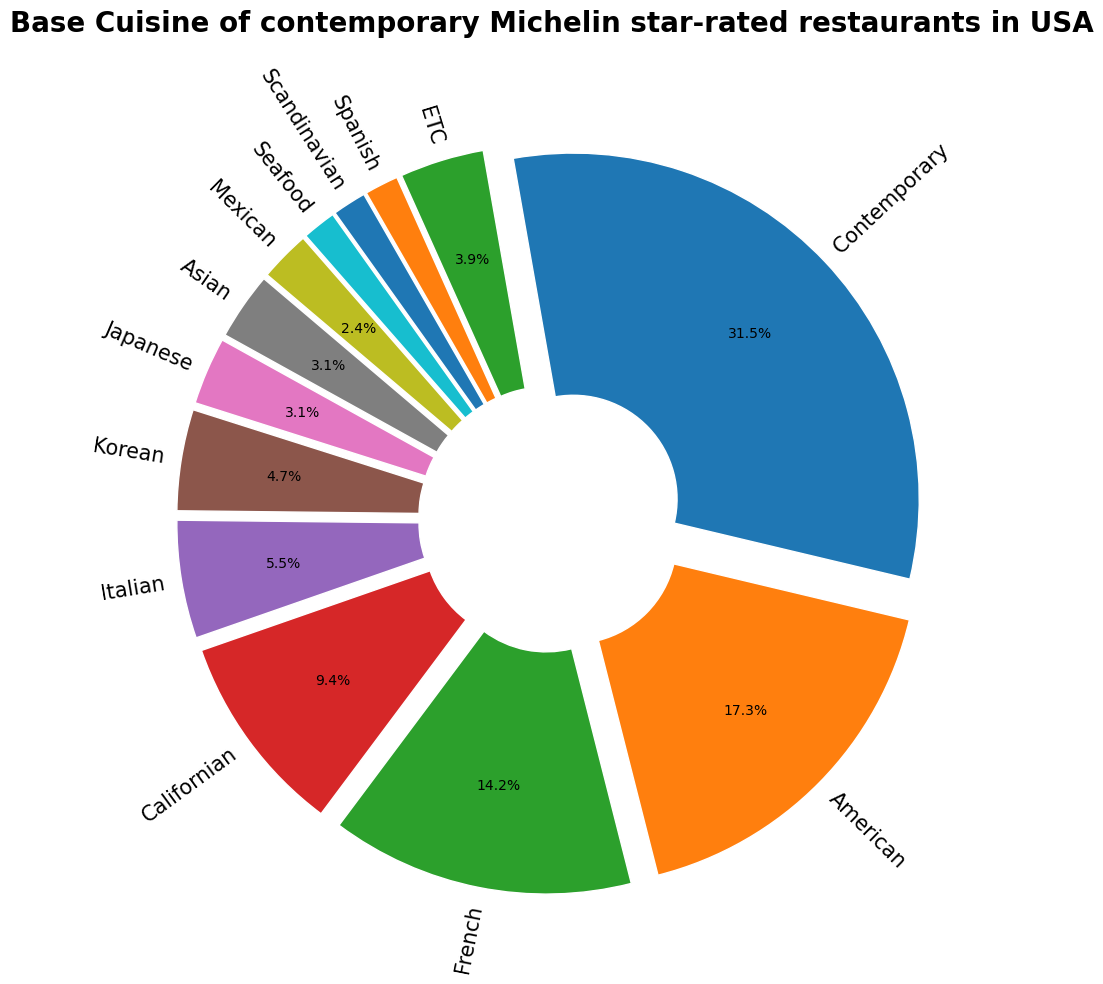

In [26]:
#Data to plot
#plot to pie chart
c_cuisine = []
c_size = []
for x,y in c_cuisine_count.items():
    c_cuisine.append(x)
    c_size.append(y)

explode =[0.085] * len(c_cuisine)
wedgeprops = {'width': 0.7, 'edgecolor': 'white'}
plt.figure(figsize=(15, 10))
plt.pie(c_size,
        labels=c_cuisine,
        rotatelabels= True,
        labeldistance =1.05,
        autopct = custom_autopct,
        startangle =100,
        pctdistance = 0.7,
        counterclock = False,
        explode = explode,
        wedgeprops = wedgeprops,
        textprops = dict(va="center", rotation_mode = 'anchor')
       )
plt.title("Base Cuisine of contemporary Michelin star-rated restaurants in USA",fontsize=20, loc= 'center', pad=40, fontweight='bold')
plt.tight_layout()
#plt.savefig("USA_contemp_Pie.png", dpi = 100)
plt.show()

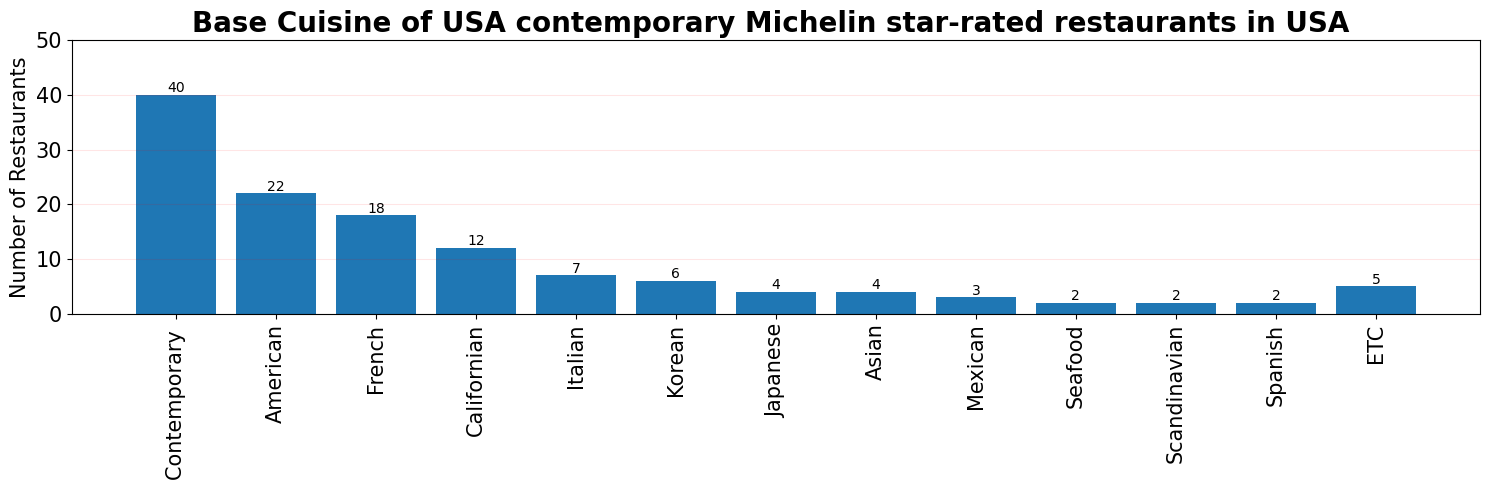

In [27]:
#use same data and draw bar chart
plt.figure(figsize=(15,5))
plt.title('Base Cuisine of USA contemporary Michelin star-rated restaurants in USA ', fontsize= 20, fontweight = 'bold')
bar = plt.bar(c_cuisine, c_size)
for idx, rect in enumerate(bar):
    plt.text(c_cuisine[idx], c_size[idx] + 0.5, c_size[idx], ha="center", color = "black")
plt.xticks(c_cuisine, rotation=90)
plt.ylabel("Number of Restaurants", fontsize = 15)
plt.ylim(0, 50)
plt.grid(axis= 'y', color = 'red', alpha=0.1)
plt.tight_layout()
#plt.savefig("USA_Contemp_Bar.png", dpi = 100)

plt.show()


### NOTE

- ETC group contains: Chinese, Colombian, European, Filipino, Vegetarian. There are only 1 restaurants for each cuisine
- If restaurants is listed just contemporary without specified cuisine in the data, they are in contemporary group.

---
## Traditional style Michelin star-rated restaurants in USA

In [28]:
#sort data and leave restraurant's main cuisine as a 'cuisine'
non_contemp = usa_star[~contemporary]
non_contemporary= [x.split(',')[0] for x in non_contemporay_list['Cuisine']]
# non_contemporary

In [29]:
#create a hash table and sort duplicates 
cuisine_count = {}

for x in range(len(non_contemporary)):
    if non_contemporary[x] not in cuisine_count.keys():
        cuisine_count[non_contemporary[x]] = 1
    else:
        cuisine_count[non_contemporary[x]] += 1
# cuisine_count

In [30]:
# if restaurant count is 1, put all of them into ETC group
cuisine_count['ETC'] = 0
i_delete = []
for i, j in cuisine_count.items():    
    if j == 1:
        cuisine_count['ETC'] += 1
        i_delete.append(i)
for k in i_delete:
    del cuisine_count[k]

# i_delete

In [31]:
#sushi restaurant should be considered as japanese cuisine
cuisine_count['Japanese'] += 1
i_delete.remove('Sushi')
#data steakhouse is not a cuisine. if we can bring data about what kind of steak they make, we fix data accordingly.
#one american, one spanish
cuisine_count['American'] += 1
i_delete.remove('Spanish')
cuisine_count['spanish'] = 2
cuisine_count['Steakhouse'] -= 2
cuisine_count['ETC'] -= 2

In [32]:
#sort cuisine_count dict to set biggest one comes first
cuisine_count = {k: v for k,v in sorted(cuisine_count.items(), key=lambda item:item[1], reverse = True)}

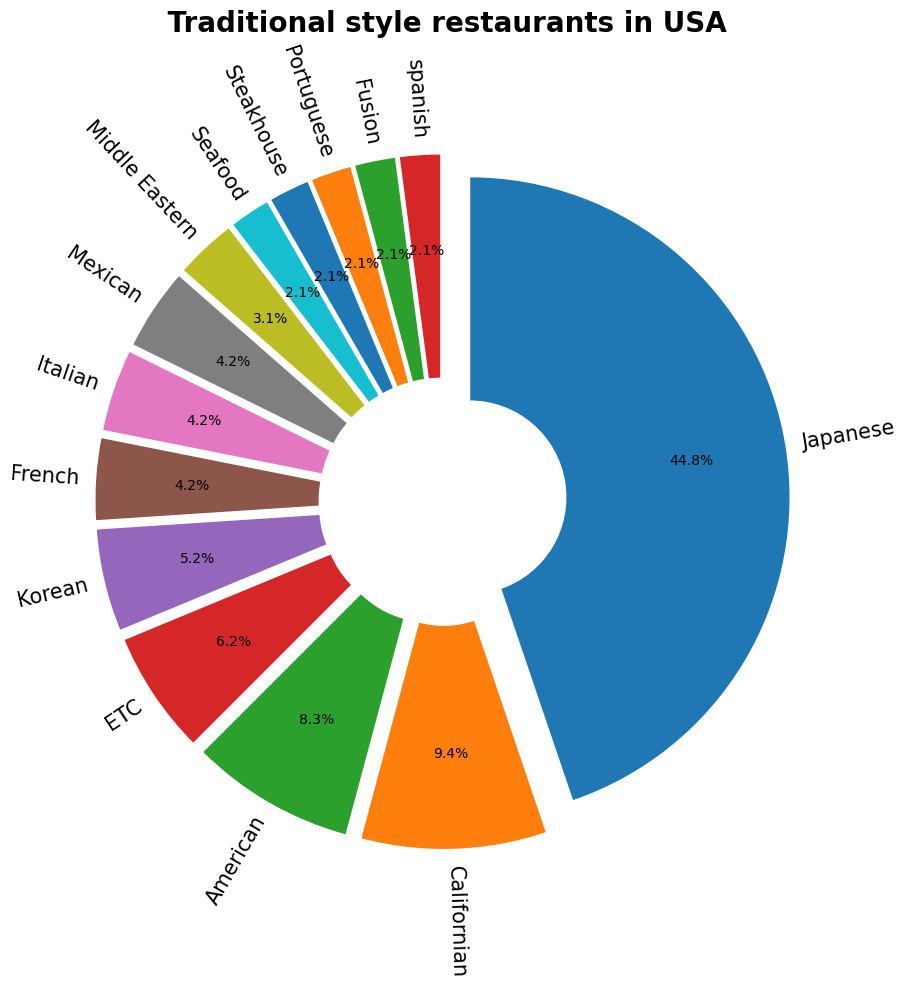

In [33]:
#Data to plot
#plot to pie chart
cuisine = []
size = []
for x,y in cuisine_count.items():
    cuisine.append(x)
    size.append(y)

explode =[0.085] * len(cuisine)
wedgeprops = {'width': 0.7, 'edgecolor': 'white'}
plt.figure(figsize=(15, 10))
plt.pie(size,
        labels=cuisine,
        rotatelabels= True,
        labeldistance =1.05,
        autopct = custom_autopct,
        startangle =90,
        counterclock = False,
        pctdistance = 0.7,
        explode = explode,
        wedgeprops = wedgeprops,
        textprops = dict(va="center", rotation_mode = 'anchor')
       )
plt.title(" Traditional style restaurants in USA", pad= 50, fontsize= 20, fontweight= 'bold')
plt.tight_layout()
#plt.savefig("USA_Noncontemp_Pie.png", dpi = 100)
plt.show()


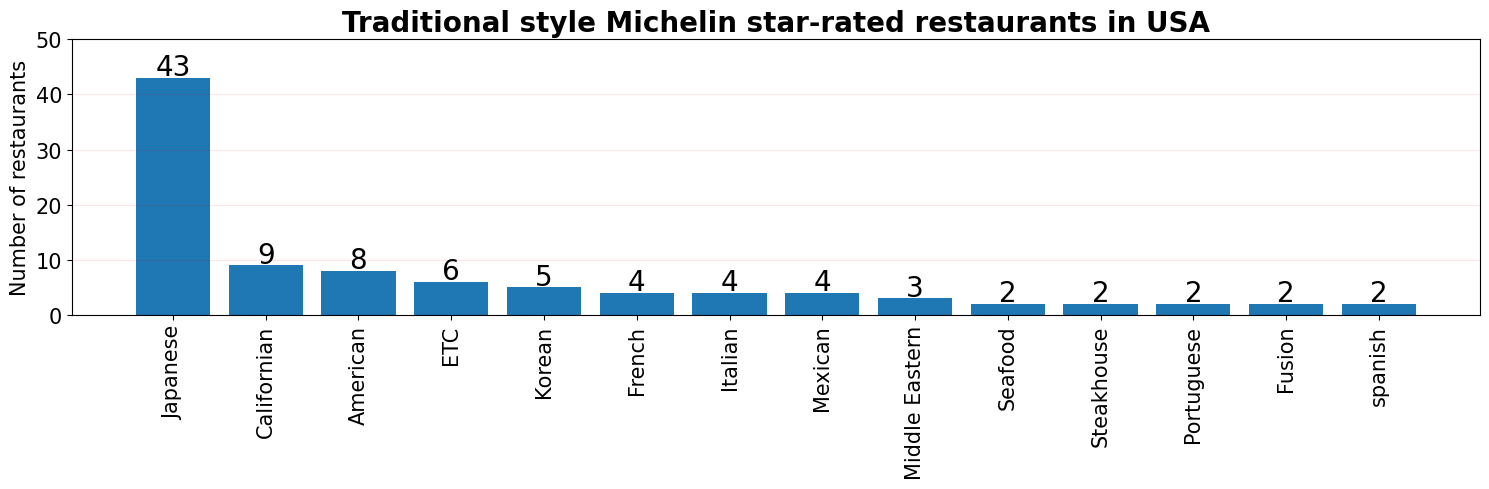

In [34]:
#draw bar chart with data
plt.figure(figsize=(15,5))
plt.title('Traditional style Michelin star-rated restaurants in USA', fontsize= 20, fontweight= 'bold')
bar = plt.bar(cuisine, size)
for idx, rect in enumerate(bar):
    plt.text(cuisine[idx], size[idx] + 0.5, size[idx], ha="center", color = "black", fontsize =20)
plt.xticks(cuisine, rotation=90)
plt.ylim(0, 50)
plt.ylabel("Number of restaurants", fontsize = 15)
plt.grid(axis= 'y', color = 'red', alpha=0.1)
plt.tight_layout()
#plt.savefig("USA_Noncontemp_Bar.png", dpi = 100)
plt.show()

### 43 Michelin star-rated restaurants serve traditional Japanese cuisine 
### About 45 % of total tradition style Michelin star-rated restaurants serve Japanese cuisine

## NOTE

- ETC group contains: Chinese, Colombian, European, Filipino, Vegetarian. There is only one restaurant for each cuisine.
- If restaurants is listed just contemporary without specified cuisine in the data, they are in contemporary group.

## Vegetarian Michelin star-rated restaurants in USA

In [35]:
veg = usa_star['Cuisine'].str.contains('Vegetarian')
usa_star[veg]

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices
1693,Dirt Candy,"86 Allen St., New York, 10002, USA","New York, USA",$$$$,Vegetarian,-73.990870,40.71794,12122287732.0,https://guide.michelin.com/en/new-york-state/n...,https://www.dirtcandynyc.com/,1 MICHELIN Star,"Air conditioning,Counter dining,Credit card / ..."
2330,Oyster Oyster,"1440 8th St., Washington, 20001, USA","Washington, USA",$$$,"Vegetarian, Contemporary",-77.023077,38.90932,No Information,https://guide.michelin.com/en/district-of-colu...,https://www.oysteroysterdc.com/,1 MICHELIN Star,"Air conditioning,American Express credit card,..."


In [36]:
value = [len(usa_star)- len(usa_star[veg]), len(usa_star[veg])]


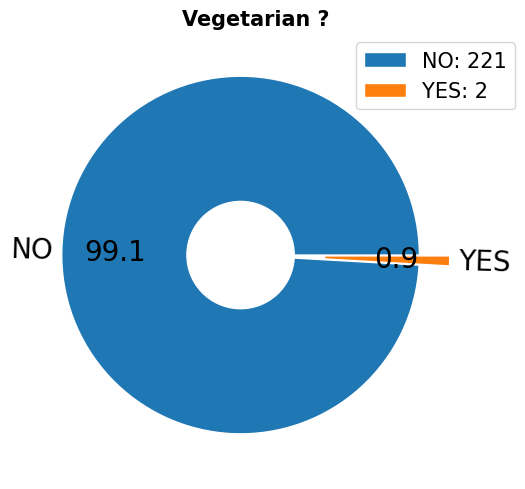

In [37]:
#Data to plot
#plot to pie chart
values = [len(usa_star)- len(usa_star[veg]), len(usa_star[veg])]
labels = ['NO', 'YES']

explode =[0.085] * len(values)
wedgeprops = {'width': 0.7, 'edgecolor': 'white'}
plt.figure(figsize=(10, 5))
plt.pie(value,
        labels=labels,
        rotatelabels= True,
        labeldistance =1.05,
        autopct = '%.1f',
        startangle =0,
        pctdistance = 0.7,
        explode = explode,
        wedgeprops = wedgeprops,
        textprops = dict(va="center", rotation_mode = 'anchor', fontsize = 20)
        
       )
labels = [f'{l}: {s}' for l, s in zip(labels, values)]
plt.legend(bbox_to_anchor=(0.7, 1), loc='upper left', labels=labels, fontsize = 15)
plt.title("Vegetarian ?", fontsize= 15, fontweight= 'bold', pad=5)
plt.tight_layout()
#plt.savefig("USA_Vegetarian_Pie.png", dpi = 100)
plt.show()

## Many michelin star restaurant may have vegetarian or vegan option for customers. However, How many Michelin star-rated restaurants USA  are mainly focus on vegetarian dishes?
### There are only 2 restaurants  in USA.
    - Dirt Candy	86 Allen St., New York, 10002, USA
    - Oyster Oyster	1440 8th St., Washington D.C, 20001, USA

In [38]:
## Which star-restaurants is considered cheapest among all

### Here are 41 restaurants that are currently listed with just single \"S\" Sign

### Single $ sign Michelin star-rated restaurants in USA

In [39]:
cheap = usa['Price'] == "$"
len(usa[cheap])


41

## The closest michelin star-rated restaurants from Washington state

- Sadly, closest Michelin star-rated restaurants in US from Washington state is California. 
- Vancouver, Canada have 8 michelin star-rated restaurants.
- list of Michelin star-rated restaurants in Vancouver, Canada.

In [40]:
vancouver = world_star_list['Location'].str.contains('Vancouver')
vancouver_list = world_star_list[vancouver]
vancouver_list.iloc[0: , 0:5]

,Name,Address,Location,Price,Cuisine
1519,Kissa Tanto,"263 E. Pender St., Vancouver, V6A 1T8, Canada","Vancouver, Canada",$$$$,"Fusion, Contemporary"
1520,Published on Main,"3593 Main St., Vancouver, V5V 3N4, Canada","Vancouver, Canada",$$$,"Contemporary, North American"
1521,Barbara,"305 E. Pender St., Vancouver, V6A 0J3, Canada","Vancouver, Canada",$$$$,"Contemporary, North American"
1522,Masayoshi,"4376 Fraser St., Vancouver, V5V 4G3, Canada","Vancouver, Canada",$$$$,"Japanese, Sushi"
1523,iDen & QuanJuDe Beijing Duck House,"2808 Cambie St., Vancouver, V5Z 2V5, Canada","Vancouver, Canada",$$$$,"Chinese, Duck Specialities"
1524,Burdock & Co,"2702 Main St., Vancouver, V5T 3E8, Canada","Vancouver, Canada",$$$$,"Contemporary, North American"
1525,St. Lawrence,"269 Powell St., Vancouver, V6A 1G3, Canada","Vancouver, Canada",$$$,"French, Regional Cuisine"
1526,AnnaLena,"1809 W. 1st Ave., Vancouver, V6J 5B8, Canada","Vancouver, Canada",$$$$,"Contemporary, Regional Cuisine"


---

## What is the northernmost Michelin star-rated restaurant in the world?

In [41]:
world_star_list.sort_values('Latitude', ascending=False).head(1)

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices
2030,ÓX,"Laugavegur 55, Reykjavík, 101, Iceland","Reykjavík, Iceland",€€€€,Modern Cuisine,-21.923461,64.144656,3545379900.0,https://guide.michelin.com/en/capital-region-i...,https://ox.restaurant/,1 MICHELIN Star,"American Express credit card,Counter dining,Cr..."


In [42]:
world_star_list.sort_values('Latitude').head(1)

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices
3364,Huto,"Avenida Jandira 677, São Paulo, 04080-004, Brazil","São Paulo, Brazil",No Information,Japanese,-46.659085,-23.60942,551150526804.0,https://guide.michelin.com/en/sao-paulo-region...,https://grupohuto.com.br/,1 MICHELIN Star,"Air conditioning,American Express credit card,..."


In [43]:
# world_star_list.loc[2030]

### Answer
- Name:                                                                    ÓX
- Address:                             Laugavegur 55, Reykjavík, 101, Iceland
- Location:                                                Reykjavík, Iceland
- Price:                                                                 €€€€
- Cuisine:                                                     Modern Cuisine
- Longitude:                                                       -21.923461
- Latitude:                                                         64.144656
- PhoneNumber:                                                   3545379900.0
- Url:                      https://guide.michelin.com/en/capital-region-i...
- WebsiteUrl:                                          https://ox.restaurant/
- Award:                                                      1 MICHELIN Star


## What is the southernmost Michelin star-rated restaurant in the world?

In [44]:
# world_star_list.loc[3364]

### Answer

- Name:                                                                 Huto
- Address:                 Avenida Jandira 677, São Paulo, 04080-004, Brazil
- Location:                                                 São Paulo, Brazil
- Price:                                                       No Information
- Cuisine:                                                           Japanese
- Longitude:                                                       -46.659085
- Latitude:                                                         -23.60942
- PhoneNumber:                                                 551150526804.0
- Url:                      https://guide.michelin.com/en/sao-paulo-region...
- WebsiteUrl:                                       https://grupohuto.com.br/
- Award:                                                      1 MICHELIN Star

## How many Michelin star-rated restaurants are specialized in Japanese cuisine in France?

- There are 7 Michelin Japanese  restaurant in France. 

In [45]:
# 4 line solution
# france = world_star_list['Location'].str.contains('France')
# france_df = world_star_list[france]
# france_japanese = france_df['Cuisine'].str.contains('Japanese')
# france_df[france_japanese]

#1 line solution
jf = world_star_list.loc[(world_star_list['Cuisine'].str.contains('Japanese')) & (world_star_list['Location'].str.contains('France'))]
jf

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices
466,L'Abysse au Pavillon Ledoyen,"8 avenue Dutuit, Paris, 75008, France","Paris, France",€€€€,"Japanese, Creative",2.316499,48.866207,33153051030.0,https://guide.michelin.com/en/ile-de-france/pa...,https://www.yannick-alleno.com/fr/,2 MICHELIN Stars,"Air conditioning,American Express credit card,..."
2375,Jin,"6 rue de la Sourdière, Paris, 75001, France","Paris, France",€€€€,"Japanese, Sushi",2.331840,48.865330,33142616071.0,https://guide.michelin.com/en/ile-de-france/pa...,https://www.jin-paris.com/fr/,1 MICHELIN Star,"Air conditioning,American Express credit card,..."
2403,Sushi B,"5 rue Rameau, Paris, 75002, France","Paris, France",€€€€,Japanese,2.337632,48.867715,33140265287.0,https://guide.michelin.com/en/ile-de-france/pa...,http://www.sushi-b-fr.com,1 MICHELIN Star,"Air conditioning,American Express credit card,..."
2431,Aida,"1 rue Pierre-Leroux, Paris, 75007, France","Paris, France",€€€€,Japanese,2.318655,48.850275,33143061418.0,https://guide.michelin.com/en/ile-de-france/pa...,No Information,1 MICHELIN Star,"Air conditioning,American Express credit card,..."
2464,Yoshi,"4 avenue de la Madone, Monaco, 98000, France","Monaco, France",€€€€,Japanese,7.427975,43.740818,37793151313.0,https://guide.michelin.com/en/monaco-region/mo...,http://www.metropole.com/fr,1 MICHELIN Star,"Air conditioning,American Express credit card,..."
2751,Sushi Shunei,"3 rue Audran, Paris, 75018, France","Paris, France",€€€€,"Japanese, Sushi",2.335849,48.885041,33644661131.0,https://guide.michelin.com/en/ile-de-france/pa...,https://www.sushishunei.com/,1 MICHELIN Star,"Air conditioning,Counter dining,Credit card / ..."
2847,Ogata,"16 rue Debelleyme, Paris, 75003, France","Paris, France",€€€€,Japanese,2.363375,48.861118,33180977680.0,https://guide.michelin.com/en/ile-de-france/pa...,http://www.ogata.com/paris/restaurant,1 MICHELIN Star,"Air conditioning,American Express credit card,..."


## How many Michelin star-rated restaurants are specialized in  French cuisine in Japan?
- There are 76 Michelin star-rated restaurants serving French cuisine in Japan. 


In [46]:
# 1 line solution
fj = world_star_list.loc[(world_star_list['Cuisine'].str.contains('French')) & (world_star_list['Location'].str.contains('Japan'))]

len(fj)

76

In [47]:
fj

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices
24,L'OSIER,"7-5-5 Ginza, Chuo-ku, Tokyo, 104-0061, Japan","Tokyo, Japan",¥¥¥¥,French,139.761233,35.669652,81335716050.0,https://guide.michelin.com/en/tokyo-region/tok...,https://losier.shiseido.co.jp/,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
25,Quintessence,"1F, Garden City Shinagawa Gotenyama, 6-7-29 Ki...","Tokyo, Japan",¥¥¥¥,French,139.732948,35.624072,81362770090.0,https://guide.michelin.com/en/tokyo-region/tok...,https://www.quintessence.jp/,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
26,L'Effervescence,"2-26-4 Nishiazabu, Minato-ku, Tokyo, 106-0031,...","Tokyo, Japan",¥¥¥¥,French,139.719454,35.660299,81357669500.0,https://guide.michelin.com/en/tokyo-region/tok...,http://www.leffervescence.jp/,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
33,Joël Robuchon,"Yebisu Garden Place, 1-13-1 Mita, Meguro-ku, T...","Tokyo, Japan",¥¥¥¥,French,139.714484,35.641870,81354241347.0,https://guide.michelin.com/en/tokyo-region/tok...,https://www.robuchon.jp/,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
210,Édition Koji Shimomura,"1F, Roppongi T-Cube, 3-1-1 Roppongi, Minato-ku...","Tokyo, Japan",¥¥¥,French,139.738152,35.665580,81355494562.0,https://guide.michelin.com/en/tokyo-region/tok...,https://www.koji-shimomura.jp/,2 MICHELIN Stars,"Air conditioning,American Express credit card,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1866,La Bécasse,"3-3-9 Hiranomachi, Chuo-ku, Osaka, 541-0046, J...","Osaka, Japan",¥¥¥,French,135.502262,34.687655,81647070070.0,https://guide.michelin.com/en/osaka-region/osa...,https://www.labecasse1990.com/,1 MICHELIN Star,"Air conditioning,American Express credit card,..."
1879,La Biographie···,"422-1 Tanakacho, Kamigyo-ku, Kyoto, 602-8163, ...","Kyoto, Japan",¥¥¥,French,135.742944,35.020156,81758236005.0,https://guide.michelin.com/en/kyoto-region/kyo...,https://la-biographie.info/,1 MICHELIN Star,"Air conditioning,American Express credit card,..."
2310,La Terrasse irisée,"1-34-7 Ayameike Kita, Nara, Nara, 631-0032, Japan","Nara, Japan",¥¥¥,French,135.760548,34.698833,81742400066.0,https://guide.michelin.com/en/nara-region/nara...,https://laterrasse.jp/,1 MICHELIN Star,"Air conditioning,American Express credit card,..."
2311,LA TRACE,"2-1-5 Omiyacho, Nara, Nara, 630-8115, Japan","Nara, Japan",¥¥¥,French,135.817160,34.682061,81742334000.0,https://guide.michelin.com/en/nara-region/nara...,http://latrace.jp/,1 MICHELIN Star,"Air conditioning,American Express credit card,..."


# How many Michelin star-rated restaurants serve French, Japanese, Korean or American?

In [48]:
jpn = len(world_star_list[world_star_list['Cuisine'].str.contains('Japan')])
amcn = len(world_star_list[world_star_list['Cuisine'].str.contains('American')])
frh = len(world_star_list[world_star_list['Cuisine'].str.contains('French')])
kor = len(world_star_list[world_star_list['Cuisine'].str.contains('Korean')])
etc = len(world_star_list) - jpn - amcn - frh - kor
total = jpn + amcn + frh + kor + etc
the_table = {'French' : frh, "Japanese" : jpn, "American" : amcn, "Korean" : kor}




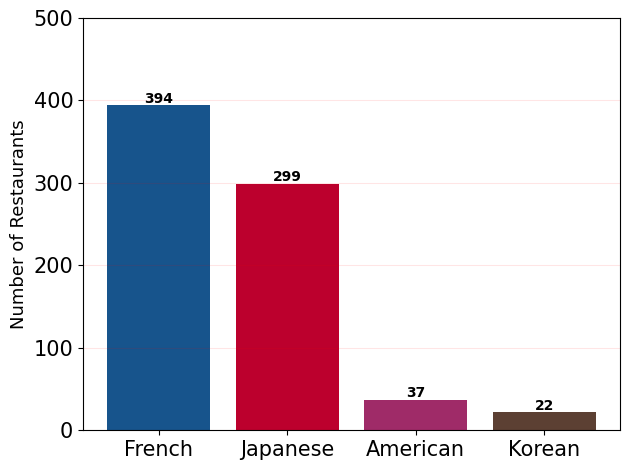

In [49]:
values = []
keys = []
for key, value in the_table.items():
    keys.append(key)
    values.append(value)
colors = ["#17548C","#BC002D","#9F2B68","#5C4033"]
bar = plt.bar(keys, values, color = colors)
plt.ylim(0, 500)
plt.ylabel("Number of Restaurants", fontsize = 13)
for idx, rect in enumerate(bar):
    plt.text(keys[idx], values[idx]+3, values[idx], ha="center", fontweight = 'bold')
plt.grid(axis= 'y', color = 'red', alpha=0.1)
plt.tight_layout()
#plt.savefig("FJAK.png", dpi = 100)

plt.show()